# Signals and Systems for Dummies, Chapter 7

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import mplcursors

# %matplotlib ipympl
%matplotlib inline

Text(0.5, 0.98, 'CT Freq Response, b=[2], a=[1, 2, 2]')

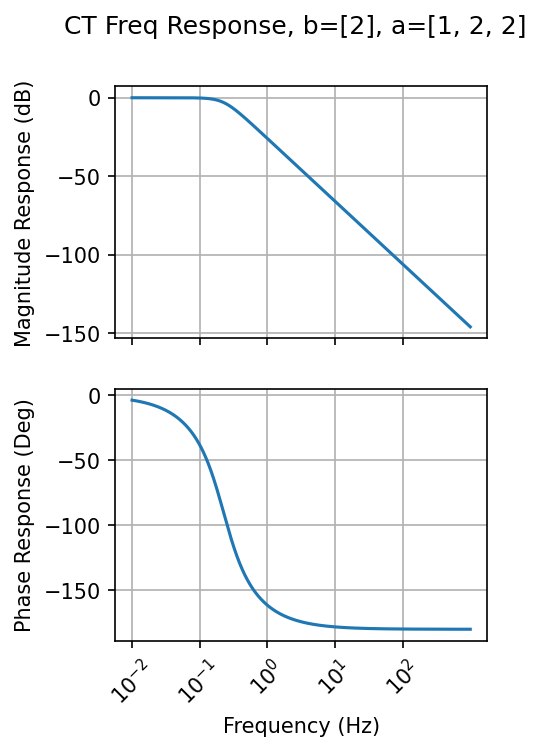

In [2]:
a = [1, 2, 2] # y coefficients (denominator)
b = [2] # x coefficients (numerator)

flims = [-2, 3] # frequency range: 10**flims[0] to 10**flims[1]


w, h = signal.freqs(b, a, worN=2*np.pi*10.0**np.linspace(*flims, 1000))
f = w/2/np.pi

fig, axs = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=(3.2, 4.8))

# axs[0].plot(np.log10(w), 20*np.log10(abs(h)))
axs[0].semilogx(f, 20*np.log10(abs(h)))
axs[0].set_ylabel("Magnitude Response (dB)")
axs[0].grid()
# axs[1].plot(np.log10(w), np.angle(h)*180/np.pi)
axs[1].semilogx(f, np.angle(h)*180/np.pi)
axs[1].set_ylabel("Phase Response (Deg)")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].grid()
axs[1].set_xticks(np.round(10.0**np.arange(*flims),2))
axs[1].tick_params("x", rotation=45)

fig.suptitle(f"CT Freq Response, b={b}, a={a}")

# mplcursors.cursor(axs)

In [3]:
h1 = h[np.argmax(f >= 1)]
print(np.abs(h1))
print(np.angle(h1))

0.05013255255011224
-2.8196104556422905


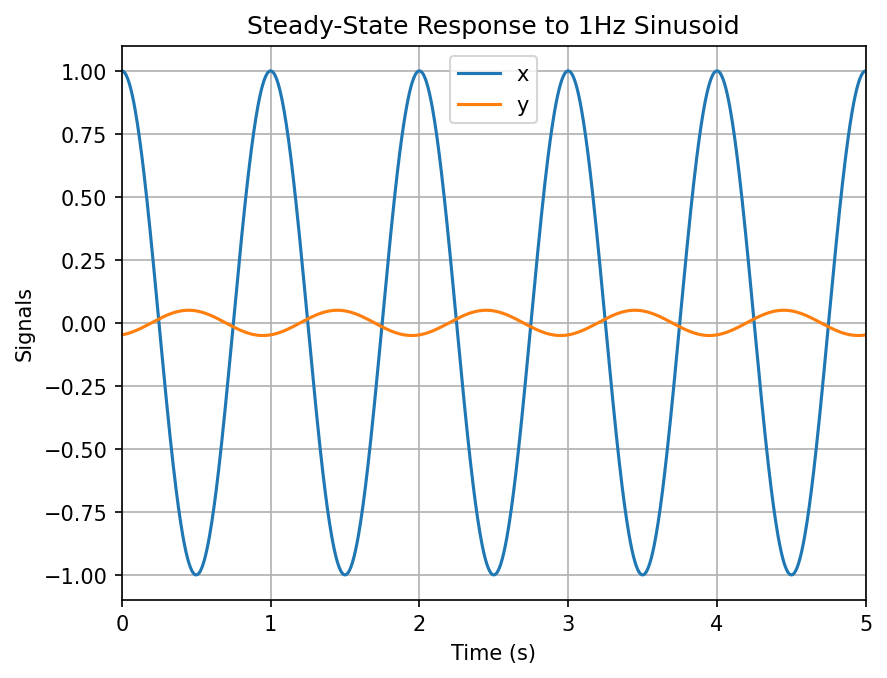

In [42]:
t = np.linspace(0, 5, 1000)

x = np.cos(2*np.pi*1*t)
y = np.abs(h1)*np.cos(2*np.pi*1*t + np.angle(h1))

fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="x")
ax.plot(t, y, label="y")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signals")
ax.set_xlim(left=0, right=5)
ax.set_title("Steady-State Response to 1Hz Sinusoid")
ax.legend()
ax.grid()

In [40]:
_, yout, xout = signal.lsim((b, a), x, t)

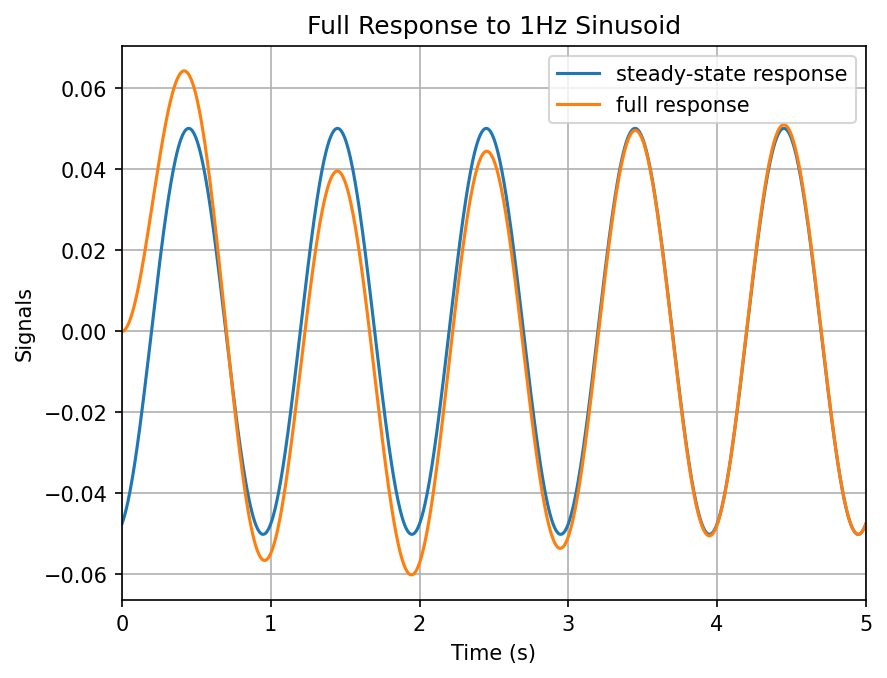

In [43]:
# fig, ax = plt.subplots(dpi=300, figsize=(3.2, 2.4))
# ax.plot(t, y, label="steady-state response")
# ax.plot(t, yout, label="full response")
# # ax.plot(t, xout, label="state")
# ax.set_xlabel("Time (s)", fontsize=8)
# ax.set_ylabel("Signals", fontsize=8)
# ax.set_xlim(left=0, right=5)
# ax.tick_params(labelsize=8)
# ax.legend(fontsize=5)
# ax.grid()

fig, ax = plt.subplots(dpi=150)
ax.plot(t, y, label="steady-state response")
ax.plot(t, yout, label="full response")
# ax.plot(t, xout, label="state")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signals")
ax.set_xlim(left=0, right=5)
ax.set_title("Full Response to 1Hz Sinusoid")
ax.legend()
ax.grid()